In [1]:
# coding:utf-8
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
from IPython.display import display

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei','Arial']})

%matplotlib inline

# 检查Python版本
from sys import version_info
if version_info.major != 3:
    raise Exception('请使用Python 3 来完成此项目')

## 导入房价数据

In [2]:
# 导入链家房价数据
import sqlite3

conn = sqlite3.connect("../data/HangZhouFangJia.db")

In [3]:
zone_df = pd.read_sql('select * from Zone;', con=conn)
community_df = pd.read_sql('select * from Community;', con=conn)
community_hist_df = pd.read_sql('select * from CommunityHistory;', con=conn)
house_df = pd.read_sql('select * from House;', con=conn)
house_hist_df = pd.read_sql('select * from HouseHistory;', con=conn)

In [4]:
# 检查缺失值情况
display(zone_df.info())
display(zone_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
id                  146 non-null int64
district            146 non-null object
bizcircle           146 non-null object
district_url_lj     146 non-null object
bizcircle_url_lj    146 non-null object
dtypes: int64(1), object(4)
memory usage: 5.8+ KB


None

,id,district,bizcircle,district_url_lj,bizcircle_url_lj
0,1,西湖,翠苑,/ershoufang/xihu/,/ershoufang/cuiyuan/
1,2,西湖,古荡,/ershoufang/xihu/,/ershoufang/gudang/
2,3,西湖,黄龙,/ershoufang/xihu/,/ershoufang/huanglong/
3,4,西湖,嘉绿,/ershoufang/xihu/,/ershoufang/jialv/
4,5,西湖,九莲,/ershoufang/xihu/,/ershoufang/jiulian/


## 新房

In [5]:
display(community_df.info())
display(community_hist_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Data columns (total 23 columns):
id                          6394 non-null int64
name                        6394 non-null object
type                        916 non-null object
district                    6394 non-null object
bizcircle                   6394 non-null object
room                        916 non-null object
orig_area_range             916 non-null object
area_range                  916 non-null object
tags                        916 non-null object
location                    6394 non-null object
estate_developer            6394 non-null object
orig_building_date          5478 non-null object
building_type               6394 non-null object
orig_total_area             916 non-null object
total_area                  916 non-null object
orig_total_building_area    916 non-null object
total_building_area         916 non-null object
orig_green_rate             916 non-null object
green_rate            

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6394 entries, 0 to 6393
Data columns (total 10 columns):
id                           6394 non-null int64
community_id                 0 non-null object
building_date                6394 non-null object
selling_date                 916 non-null object
selling_status               6394 non-null object
main_avg_price_perm          6394 non-null object
min_total_price              916 non-null object
min_total_price_per_house    916 non-null object
url_lj                       6394 non-null object
effective_date               6394 non-null object
dtypes: int64(1), object(9)
memory usage: 499.6+ KB


None

In [6]:
display(zone_df.head())
display(community_df.head(5))
display(community_hist_df.head(5))

,id,district,bizcircle,district_url_lj,bizcircle_url_lj
0,1,西湖,翠苑,/ershoufang/xihu/,/ershoufang/cuiyuan/
1,2,西湖,古荡,/ershoufang/xihu/,/ershoufang/gudang/
2,3,西湖,黄龙,/ershoufang/xihu/,/ershoufang/huanglong/
3,4,西湖,嘉绿,/ershoufang/xihu/,/ershoufang/jialv/
4,5,西湖,九莲,/ershoufang/xihu/,/ershoufang/jiulian/


,id,name,type,district,bizcircle,room,orig_area_range,area_range,tags,location,estate_developer,orig_building_date,building_type,orig_total_area,total_area,orig_total_building_area,total_building_area,orig_green_rate,green_rate,orig_volume_rate,volume_rate,url_lj,effective_date
0,1,佳源中心广场,商业类,上虞区,上虞区,,,,,伞城大道佳源中心广场,绍兴广源房地产开发有限公司,None,板楼,"38,533㎡","38,533","120,000㎡","120,000",15%,15,3.50,3.50,/loupan/p_jyzxgcafmkn/,2019-02-27
1,2,滨江春盛大江名筑,住宅,大江东,大江东,4室|5室,建面 143-178㎡,143-178,绿化率高,义府大街与河西弄交叉口,杭州春盛置业有限公司,None,小高层,"37,282㎡","37,282","105,530㎡","105,530",30%,30,1.80,1.80,/loupan/p_bjcsdjmzbjofo/,2019-02-27
2,3,九龙仓君玺,住宅,下城,和平,,建面 345-380㎡,345-380,品牌房企|现房|绿化率高|车位充足|近地铁,东新路21号,"九龙仓（杭州）置业有限公司,堡盈房地产（杭州）有限公司",None,板楼、塔板结合,"27,000㎡","27,000","120,000㎡","120,000",30%,30,3.30,3.30,/loupan/p_jlcjxaaoaq/,2019-02-27
3,4,金洲海尚,住宅,海盐县,海盐县,3室,建面 89-91㎡,89-91,绿化率高|车位充足,华丰路金洲海尚,浙江秦山建设股份有限公司,None,板楼,"60,724㎡","60,724","1,155,280㎡","1,155,280",35%,35,1.90,1.90,/loupan/p_jzhsafmja/,2019-02-27
4,5,滨江盛元湘湖里,别墅,萧山,义桥,,,,绿化率高,湘湖度假区内，湘师路和湘虎路交汇处,杭州滨江盛元房地产开发有限公司,None,独栋别墅,"46,621㎡","46,621","157,740㎡","157,740",30%,30,1.01,1.01,/loupan/p_bjsyxhlbjnet/,2019-02-27


,id,community_id,building_date,selling_date,selling_status,main_avg_price_perm,min_total_price,min_total_price_per_house,url_lj,effective_date
0,1,None,2019-12-31,2018-5-24,下期待开,价格待定,,,/loupan/p_jyzxgcafmkn/,2019-02-27
1,2,None,2020-3-31,2018-12-1,在售,15000,总价214万/套起,2140000,/loupan/p_bjcsdjmzbjofo/,2019-02-27
2,3,None,2017-12-31,2016-7-15,在售,68000,,,/loupan/p_jlcjxaaoaq/,2019-02-27
3,4,None,2019-12-30,2018-5-1,在售,13000,总价115万/套起,1150000,/loupan/p_jzhsafmja/,2019-02-27
4,5,None,预计2019-3,,下期待开,价格待定,,,/loupan/p_bjsyxhlbjnet/,2019-02-27


In [7]:
community_df['estate_developer'].value_counts().head()

暂无信息             2037
杭州市城建开发集团有限公司     476
无开发商              310
杭州城建开发集团有限公司      218
杭州市城建发展置业有限公司      87
Name: estate_developer, dtype: int64

In [8]:
import datetime


# new community ############
# merge hangzhou zone
new_df = pd.merge(community_df, zone_df, how='right', left_on=['district', 'bizcircle'],
                  right_on=['district', 'bizcircle'], suffixes=('', '_'))
new_df = new_df[new_df['id'].notna()]
# merge history price
new_df = pd.merge(new_df, community_hist_df, how='left', left_on='url_lj', right_on='url_lj', suffixes=('', '_'))
new_df = new_df[['id', 'name', 'type', 'district', 'bizcircle', 'location', 'building_type', 'total_area',
                 'total_building_area', 'green_rate', 'volume_rate', 'building_date', 'main_avg_price_perm',
                 'min_total_price_per_house']]
new_df = new_df[new_df['id'].notna()]
# cast some columns to numeric
new_df['id'] = new_df['id'].astype(int)
new_df['total_area'] = new_df['total_area'].str.replace(',', '')
new_df['days_to_today'] = pd.Timestamp(datetime.datetime.now().date())
new_df['building_date'] = new_df['building_date'].str.replace('预计', '', regex=False)
new_df['building_date'] = pd.to_datetime(new_df['building_date'], format='%Y-%m-%d', errors='coerce')
new_df['days_to_today'] = (new_df['building_date'] - new_df['days_to_today']).apply(lambda x: x.days)
new_df['total_building_area'] = new_df['total_building_area'].str.replace(',', '')
# cast some columns to numeric
for col in ('total_area', 'total_building_area', 'green_rate', 'volume_rate', 'main_avg_price_perm',
            'min_total_price_per_house'):
    new_df[col] = pd.to_numeric(new_df[col], errors='coerce')

new_df.shape
new_df.head()

,id,name,type,district,bizcircle,location,building_type,total_area,total_building_area,green_rate,volume_rate,building_date,main_avg_price_perm,min_total_price_per_house,days_to_today
0,2,滨江春盛大江名筑,住宅,大江东,大江东,义府大街与河西弄交叉口,小高层,37282.0,105530.0,30.0,1.8,2020-03-31,15000.0,2140000.0,364.0
1,21,大江东宝龙广场,别墅,大江东,大江东,青六路与江东大道交汇口,板楼,120000.0,450000.0,30.0,2.6,2019-12-01,NaN,NaN,243.0
2,39,宋都相贤府,住宅,大江东,大江东,青六南路宋都相贤府,小高层,38000.0,100000.0,30.0,1.6,2020-12-30,13200.0,NaN,638.0
3,90,大江东宝龙广场,住宅,大江东,大江东,青六路与江东大道交汇口,板楼,120000.0,450000.0,30.0,2.6,2019-12-01,16200.0,NaN,243.0
4,103,龙湖江与城,住宅,大江东,大江东,大江东青六路与江东大道交叉口往北,板楼,140000.0,500000.0,30.0,2.6,2021-06-30,NaN,NaN,820.0


In [9]:
new_df[new_df['name']=='新城香悦奥府']

,id,name,type,district,bizcircle,location,building_type,total_area,total_building_area,green_rate,volume_rate,building_date,main_avg_price_perm,min_total_price_per_house,days_to_today
1486,631,新城香悦奥府,住宅,萧山,萧山新城区,建设二路新城香悦奥府,板楼,51255.0,190000.0,30.0,2.8,2018-12-31,NaN,NaN,-92.0
1571,4123,新城香悦奥府,None,萧山,萧山新城区,(萧山萧山新城区)建设二路新城香悦奥府,板楼,NaN,NaN,NaN,NaN,2018-01-01,35604.0,NaN,-456.0


In [10]:
# drop_duplicates
new_df = new_df.sort_values(by=['name', 'type', 'district', 'bizcircle', 'location', 'building_type', 'total_area',
                                'total_building_area', 'green_rate', 'volume_rate', 'main_avg_price_perm'])
new_df = new_df.drop_duplicates(subset=['name', 'district', 'bizcircle'])

new_df[new_df['name']=='新城香悦奥府']

,id,name,type,district,bizcircle,location,building_type,total_area,total_building_area,green_rate,volume_rate,building_date,main_avg_price_perm,min_total_price_per_house,days_to_today
1486,631,新城香悦奥府,住宅,萧山,萧山新城区,建设二路新城香悦奥府,板楼,51255.0,190000.0,30.0,2.8,2018-12-31,NaN,NaN,-92.0


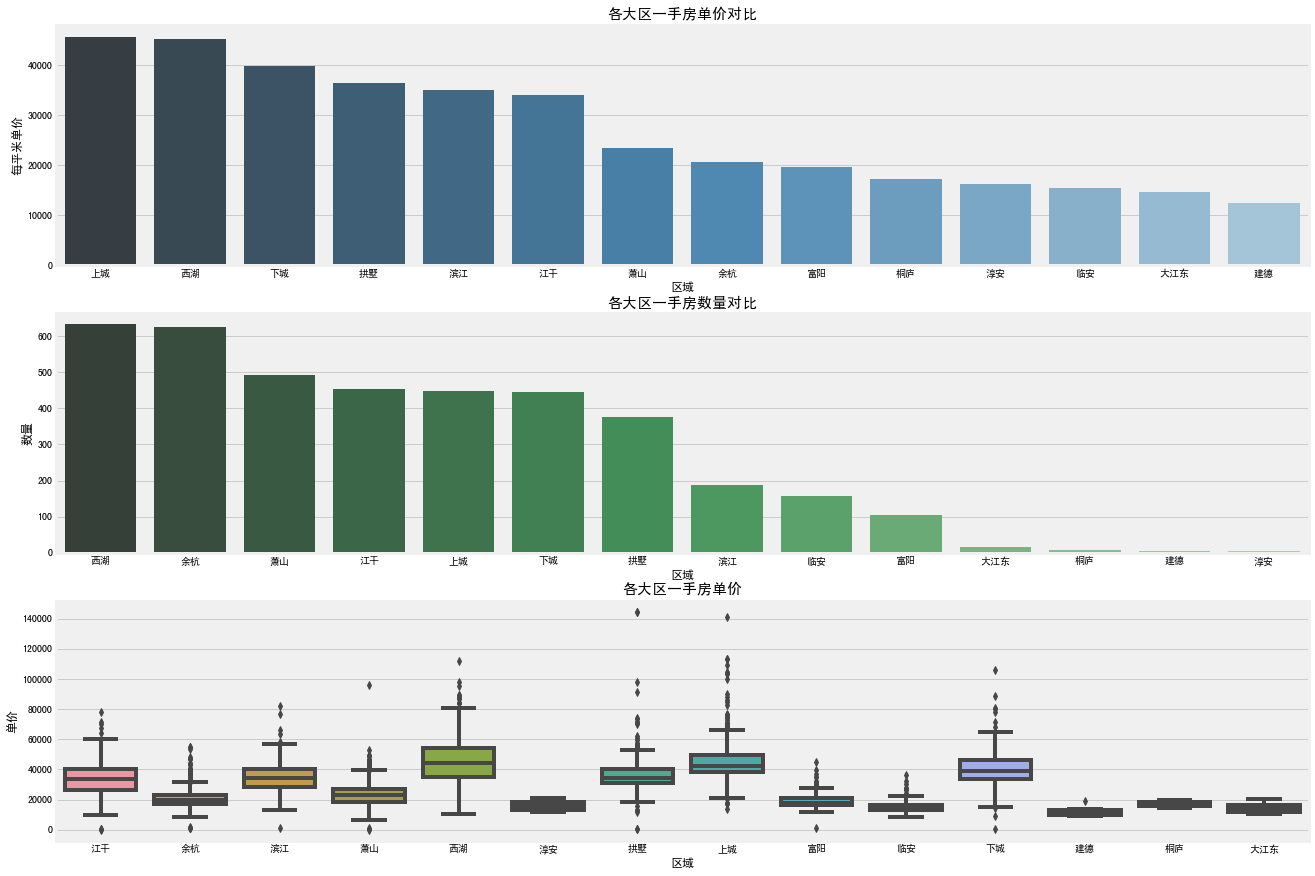

In [11]:
new_df['region'] = new_df['district'] + '|' + new_df['bizcircle']
community_df_mean = new_df.groupby('district')['main_avg_price_perm'].mean().sort_values(ascending=False).to_frame().reset_index()
community_df_count = new_df.groupby('district')['main_avg_price_perm'].count().sort_values(ascending=False).to_frame().reset_index()

f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(20,15))

sns.barplot(x='district', y='main_avg_price_perm', palette="Blues_d", data=community_df_mean, ax=ax1)
ax1.set_title('各大区一手房单价对比',fontsize=15)
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')

sns.barplot(x='district', y='main_avg_price_perm', palette="Greens_d", data=community_df_count, ax=ax2)
ax2.set_title('各大区一手房数量对比',fontsize=15)
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')

sns.boxplot(x='district', y='main_avg_price_perm', data=new_df)
ax3.set_title('各大区一手房单价',fontsize=15)
ax3.set_xlabel('区域')
ax3.set_ylabel('单价')

plt.show()

## 二手房

In [12]:
display(house_df.info())
display(house_hist_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4279 entries, 0 to 4278
Data columns (total 13 columns):
id                 4279 non-null int64
community_id       0 non-null object
community_name     4279 non-null object
room               4279 non-null object
area               4279 non-null object
orient             4279 non-null object
decoration         4279 non-null object
elevator           4279 non-null object
orig_flood_info    4279 non-null object
flood              4279 non-null object
total_flood        4279 non-null object
url_lj             4279 non-null object
effective_date     4279 non-null object
dtypes: int64(1), object(12)
memory usage: 434.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4279 entries, 0 to 4278
Data columns (total 5 columns):
id                4279 non-null int64
house_id          0 non-null object
total_price       4279 non-null object
url_lj            4279 non-null object
effective_date    4279 non-null object
dtypes: int64(1), object(4)
memory usage: 167.2+ KB


None

In [13]:
display(house_df.head())
display(house_hist_df.head())

,id,community_id,community_name,room,area,orient,decoration,elevator,orig_flood_info,flood,total_flood,url_lj,effective_date
0,1,None,新城香悦奥府,3室1厅,86.18平米,南 北,毛坯,有电梯,高楼层(共27层)2018年建板楼 -,高楼层,27,/ershoufang/103103115464.html,2019-02-27
1,2,None,金地自在城,3室2厅,89平米,南,精装,有电梯,中楼层(共26层)2012年建板楼 -,中楼层,26,/ershoufang/103103285678.html,2019-02-27
2,3,None,中海西溪华府,3室2厅,86.55平米,南,精装,有电梯,低楼层(共10层)2013年建板楼 -,低楼层,10,/ershoufang/103102597408.html,2019-02-27
3,4,None,泰禾野风大城小院,联排别墅,5室2厅,300.24平米,南,毛坯,4层2019年建板楼 -,,,/ershoufang/103103913054.html,2019-02-27
4,5,None,阳光逸城,2室1厅,61平米,东 南 北,精装,有电梯,中楼层(共15层)2010年建塔楼 -,中楼层,15,/ershoufang/103103525818.html,2019-02-27


,id,house_id,total_price,url_lj,effective_date
0,1,None,3300000,/ershoufang/103103115464.html,2019-02-27
1,2,None,3650000,/ershoufang/103103285678.html,2019-02-27
2,3,None,3950000,/ershoufang/103102597408.html,2019-02-27
3,4,None,5100000,/ershoufang/103103913054.html,2019-02-27
4,5,None,1800000,/ershoufang/103103525818.html,2019-02-27


In [14]:
# old house ############
# merge hangzhou zone with new_df
old_df = pd.merge(house_df, new_df, how='left', left_on=['community_name'], right_on=['name'])
# merge history price
old_df = pd.merge(old_df, house_hist_df, how='left', left_on='url_lj', right_on='url_lj', suffixes=('', '_'))
old_df = old_df[old_df['id'].notna()]
# cast some columns to numeric
old_df['area'] = old_df['area'].str.replace('平米', '', regex=False)
for col in ('green_rate', 'volume_rate', 'area', 'total_price'):
    old_df[col] = pd.to_numeric(old_df[col], errors='coerce')
# drop_duplicates
old_df = old_df.sort_values(by=['community_name', 'type', 'district', 'bizcircle', 'location', 'building_type',
                                'green_rate', 'volume_rate', 'building_date', 'total_price'])
old_df = old_df.drop_duplicates(subset=['community_name', 'district', 'bizcircle'])
old_df = old_df[old_df['id'].notna()]
# filter fields
old_df = old_df[['id', 'community_name', 'type', 'district', 'bizcircle', 'location', 'building_type', 'green_rate',
                 'volume_rate', 'building_date', 'days_to_today', 'room', 'area', 'orient', 'decoration',
                 'elevator', 'orig_flood_info', 'flood', 'total_flood', 'total_price']]


old_df.shape
old_df.head()

,id,community_name,type,district,bizcircle,location,building_type,green_rate,volume_rate,building_date,days_to_today,room,area,orient,decoration,elevator,orig_flood_info,flood,total_flood,total_price
2561,2561,一清新村,None,拱墅,湖墅,(拱墅湖墅)文一路15号,板楼,NaN,NaN,1996-01-01,-8492.0,2室1厅,50.00,南,简装,无电梯,高楼层(共6层)1997年建板楼 -,高楼层,6,2300000.0
2452,2452,丁桥兰苑,None,江干,丁桥,(江干丁桥)惠兰雅路58号,板楼,NaN,NaN,2000-01-01,-7031.0,2室2厅,83.47,南,毛坯,有电梯,高楼层(共11层)2000年建板楼 -,高楼层,11,2050000.0
4092,4092,丁桥大唐苑,None,江干,丁桥,(江干丁桥)蕙兰雅路丁桥大唐苑,板楼,NaN,NaN,2012-01-01,-2648.0,4室2厅,126.68,南,简装,无电梯,低楼层(共6层)2012年建板楼 -,低楼层,6,2800000.0
1133,1134,丁桥家苑,None,江干,丁桥,(江干丁桥)惠兰雅路267号,板楼,NaN,NaN,2008-01-01,-4109.0,3室2厅,103.62,南,毛坯,无电梯,低楼层(共6层)2008年建板楼 -,低楼层,6,2550000.0
114,115,丁桥景园北苑,None,江干,丁桥,(江干丁桥)勤丰路25号,板楼,NaN,NaN,2000-01-01,-7031.0,2室2厅,83.25,南 北,简装,有电梯,中楼层(共15层)2000年建板楼 -,中楼层,15,2100000.0
